In [2]:
%load_ext lab_black

# Creating the graph for neural-lam

Within `neural-lam` one single graph is used to represent encode-process-decode operations of the data-driven weather model. The graph is a directed acyclic graph (DAG) with the nodes representing features at a given location in space and the edges representing flow of information.

The graph is comprised of three components that represent the three encode-process-decode operations:

- `g2m`; The encoding of physical variables given at *grid* coordinates onto the computational *mesh* space.
- `m2m`; The processing of the data in the computational *mesh* space.
- `m2g`; The decoding from the computational *mesh* space onto the physical *grid* space.

The graph is a directed acyclic graph (DAG) with the nodes representing points in space and the edges 


*Table of contents*

- [Introduction](#Introduction)
- [The grid graph component](#The-grid-graph-component)
- [Graph architypes](#graph-architypes)
    - [Keissler flat nearest neighbor graph](#the-keisler-2022-single-range-mesh)
    - [Graphcast](#graphcast-lam-et-al-2022-graph)
    - [Oscarsson hierarchical graph](#



In [5]:
import networkx
import torch_geometric as pyg
import numpy as np
import matplotlib.pyplot as plt

import neural_lam.graph.create as graph_creation
import neural_lam.graph.mesh as mesh_graphs
import neural_lam.graph.plot as graph_plots

In [6]:
def _create_fake_xy(N=10):
    x = np.linspace(0, 1, N)
    y = np.linspace(0, 1, N)
    xy = np.meshgrid(x, y)
    xy = np.stack(xy, axis=0)
    return xy

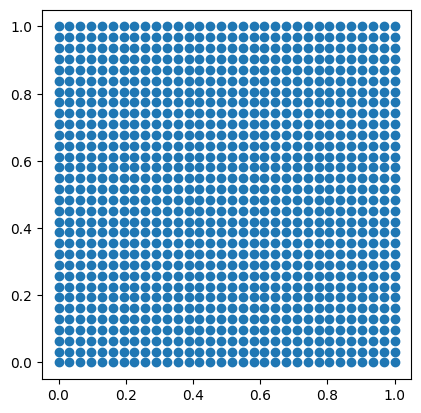

In [7]:
xy = _create_fake_xy(32)

fig, ax = plt.subplots()
ax.scatter(xy[0], xy[1])
ax.set_aspect(1)

## The "mesh" graph

Lets start with a simple mesh which only has nearest neighbour connections.

<Axes: >

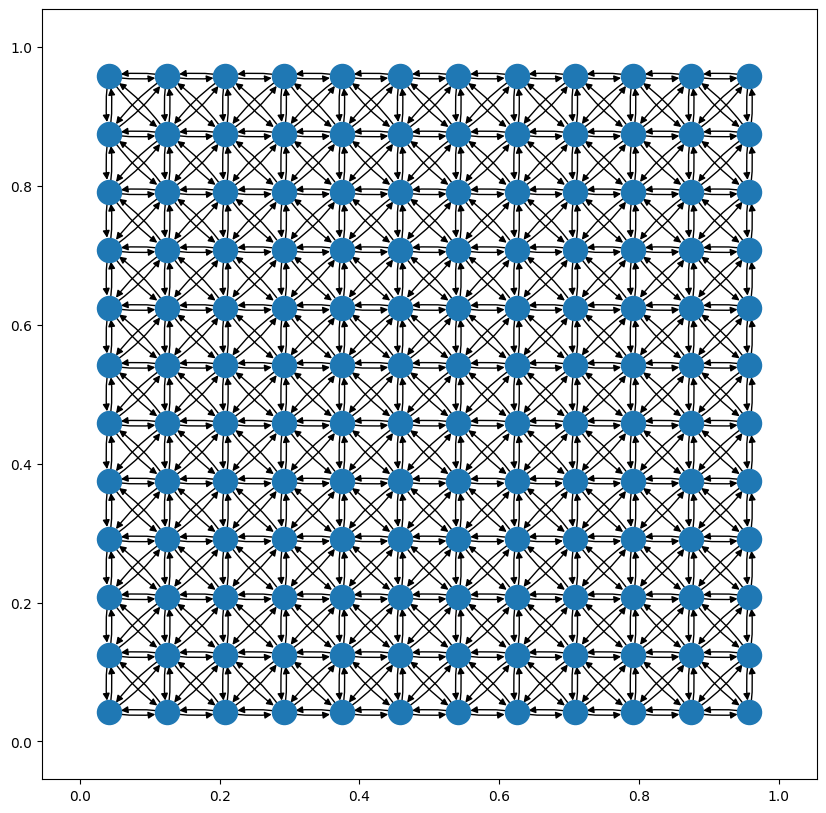

In [5]:
g_m2m = mesh_graphs.mesh.create_single_level_2d_mesh_graph(xy=xy, nx=12, ny=12)

graph_plots.nx_draw_with_pos_and_attr(g_m2m)

# Graph architypes

## The Keisler 2022 single-range mesh

In [9]:
graph = graph_creation.architypes.create_keissler_graph(xy_grid=xy)
graph

<Axes: >

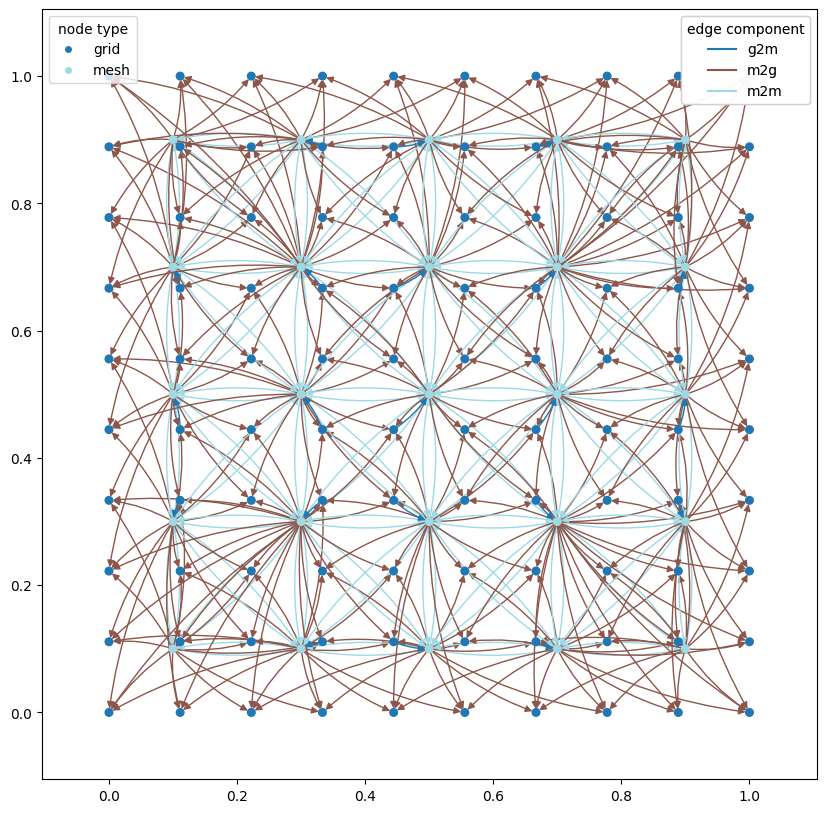

In [8]:
graph_plots.nx_draw_with_pos_and_attr(
    graph, node_size=30, edge_color_attr="component", node_color_attr="type"
)

In [10]:
graph_components = graph_creation.architypes.create_keissler_graph(
    xy_grid=xy, merge_components=False
)
graph_components

{'m2m': <networkx.classes.digraph.DiGraph at 0x71c04ec9fa30>,
 'g2m': <networkx.classes.digraph.DiGraph at 0x71c0550fc7c0>,
 'm2g': <networkx.classes.digraph.DiGraph at 0x71c0550fceb0>}

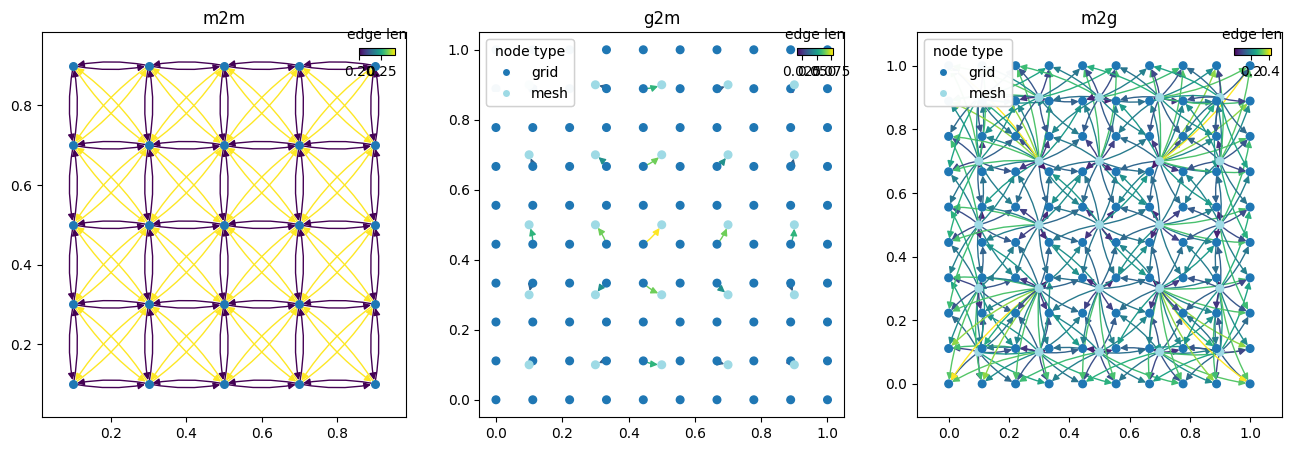

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 5))

for (name, graph), ax in zip(graph_components.items(), axes.flatten()):
    pl_kwargs = {}
    if name == "m2m":
        pl_kwargs = dict(edge_color_attr="len")
    elif name == "g2m" or name == "m2g":
        pl_kwargs = dict(edge_color_attr="len", node_color_attr="type")

    graph_plots.nx_draw_with_pos_and_attr(graph, ax=ax, node_size=30, **pl_kwargs)
    ax.set_title(name)

## GraphCast (Lam et al 2022) graph

In [12]:
graph = graph_creation.architypes.create_graphcast_graph(xy_grid=xy)

2024-04-19 17:11:28.850 | INFO     | neural_lam.graph.mesh.mesh:create_multirange_2d_mesh_graphs:119 - nlev: 3, nleaf: 8, mesh_levels: 2


<Axes: >

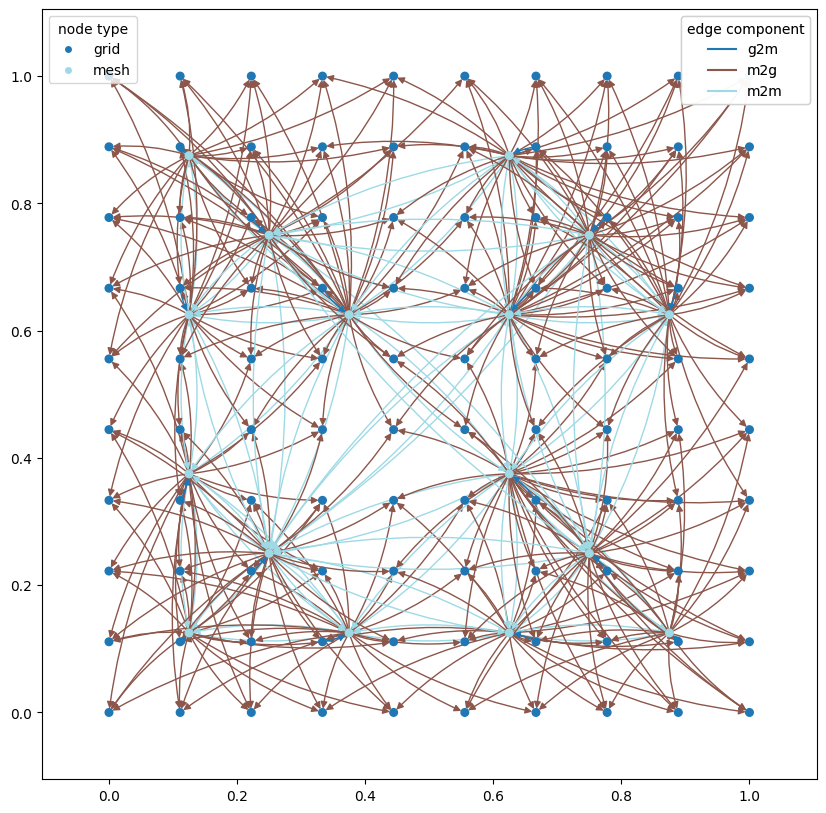

In [13]:
graph_plots.nx_draw_with_pos_and_attr(
    graph, node_size=30, edge_color_attr="component", node_color_attr="type"
)

In [28]:
graph_components = graph_creation.architypes.create_graphcast_graph(
    xy_grid=xy, merge_components=False, refinement_factor=1
)
graph_components

/home/leif/git-repos/dmi/mllam/neural-lam/neural_lam/graph/mesh/mesh.py:111: RuntimeWarning: divide by zero encountered in scalar divide
  nlev = int(np.log(max(xy.shape)) / np.log(refinement_factor))


OverflowError: cannot convert float infinity to integer

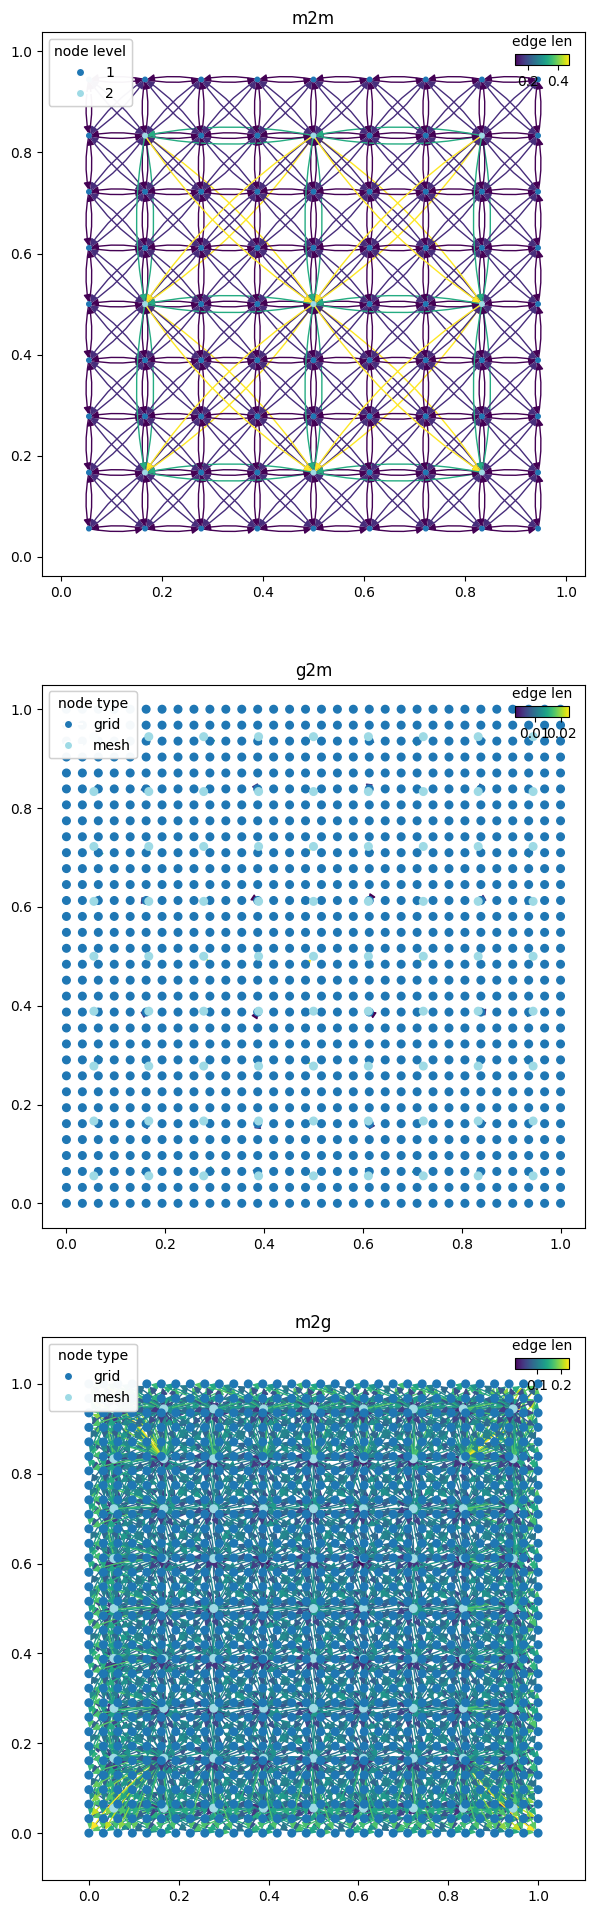

In [37]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 24))

for (name, graph), ax in zip(graph_components.items(), axes.flatten()):
    pl_kwargs = {}
    if name == "m2m":
        pl_kwargs = dict(edge_color_attr="len", node_color_attr="level", node_size=10)
    elif name == "g2m" or name == "m2g":
        pl_kwargs = dict(edge_color_attr="len", node_color_attr="type", node_size=30)

    graph_plots.nx_draw_with_pos_and_attr(graph, ax=ax, **pl_kwargs)
    ax.set_title(name)
    ax.set_aspect(1.0)

## Oscarsson et al 2023 hierarchical graph

In [8]:
graph = graph_creation.architypes.create_oscarsson_hierarchical_graph(xy_grid=xy)
graph

2024-04-24 14:56:20.848 | INFO     | neural_lam.graph.mesh.mesh:create_multirange_2d_mesh_graphs:121 - nlev: 5, nleaf: 32, mesh_levels: 3


<Axes: >

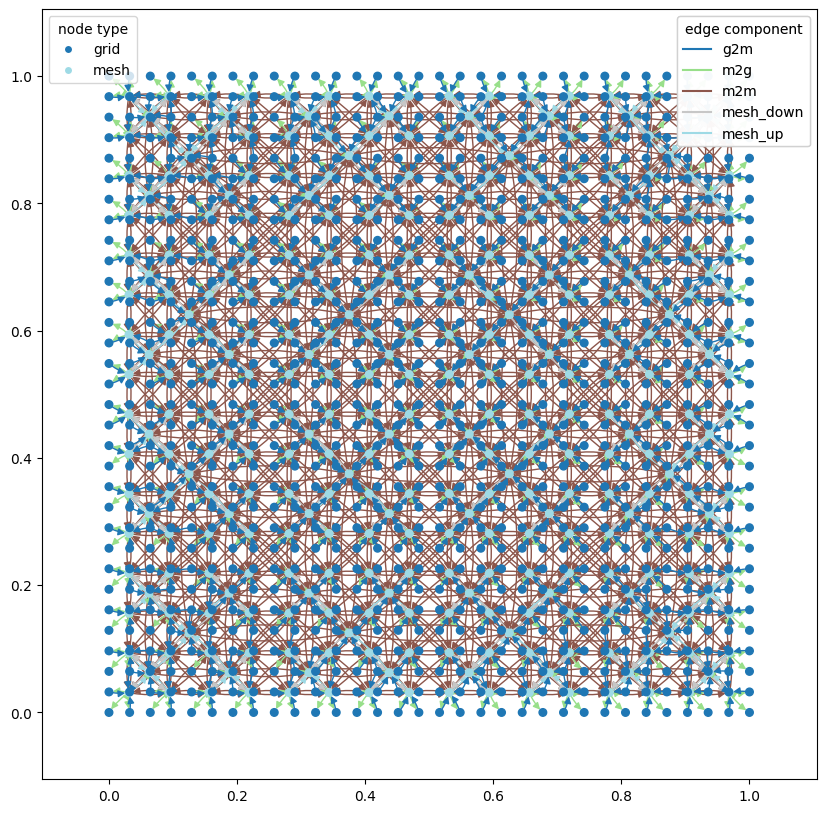

In [15]:
graph_plots.nx_draw_with_pos_and_attr(
    graph, node_size=30, edge_color_attr="component", node_color_attr="type"
)

In [16]:
graph_components = graph_creation.architypes.create_oscarsson_hierarchical_graph(
    xy_grid=xy, merge_components=False
)
graph_components

2024-04-23 21:47:02.762 | INFO     | neural_lam.graph.mesh.mesh:create_multirange_2d_mesh_graphs:121 - nlev: 5, nleaf: 32, mesh_levels: 3


{'m2m': <networkx.classes.digraph.DiGraph at 0x7b5413e01f60>,
 'mesh_down': <networkx.classes.digraph.DiGraph at 0x7b5413e00ac0>,
 'mesh_up': <networkx.classes.digraph.DiGraph at 0x7b5413e00760>,
 'g2m': <networkx.classes.digraph.DiGraph at 0x7b5413e02290>,
 'm2g': <networkx.classes.digraph.DiGraph at 0x7b5413e01cc0>}

In [1]:
n_components = len(graph_components)
fig, axes = plt.subplots(nrows=n_components, ncols=1, figsize=(11, 9 * n_components))

for (name, graph), ax in zip(graph_components.items(), axes.flatten()):
    pl_kwargs = {}
    if name == "m2m":
        pl_kwargs = dict(edge_color_attr="len", node_color_attr="level", node_size=10)
    elif name == "g2m" or name == "m2g":
        pl_kwargs = dict(edge_color_attr="len", node_color_attr="type", node_size=30)
    elif name in ["mesh_up", "mesh_down"]:
        pl_kwargs = dict(
            edge_color_attr="levels", node_color_attr="level", node_size=30
        )

    graph_plots.nx_draw_with_pos_and_attr(graph, ax=ax, **pl_kwargs)
    ax.set_title(name)
    ax.set_aspect(1.0)

NameError: name 'graph_components' is not defined

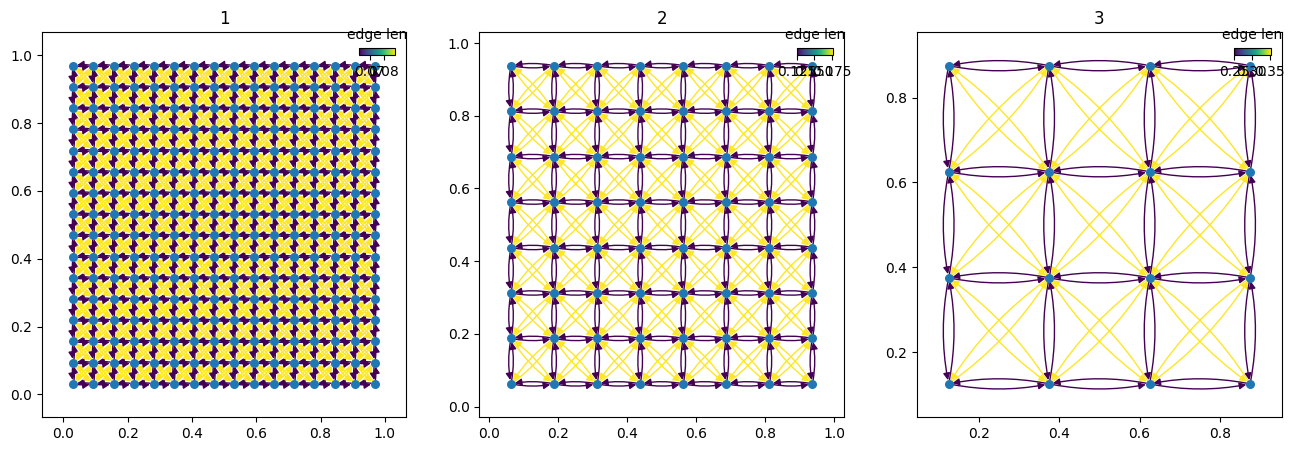

In [21]:
def split_graph_by_attribute(node_attr, graph):
    node_attr_values = set(networkx.get_node_attributes(graph, node_attr).values())
    subgraphs = {}
    for attr_value in node_attr_values:
        subgraph_nodes = [
            node
            for node, attr in networkx.get_node_attributes(graph, node_attr).items()
            if attr == attr_value
        ]
        subgraph = graph.subgraph(subgraph_nodes)
        subgraphs[attr_value] = subgraph
    return subgraphs


split_graphs = split_graph_by_attribute("level", graph_components["m2m"])

fig, axes = plt.subplots(nrows=1, ncols=len(split_graphs), figsize=(16, 5))
for (name, graph), ax in zip(split_graphs.items(), axes.flatten()):
    graph_plots.nx_draw_with_pos_and_attr(
        graph, ax=ax, node_size=30, edge_color_attr="len"
    )
    ax.set_title(name)

<Axes: >

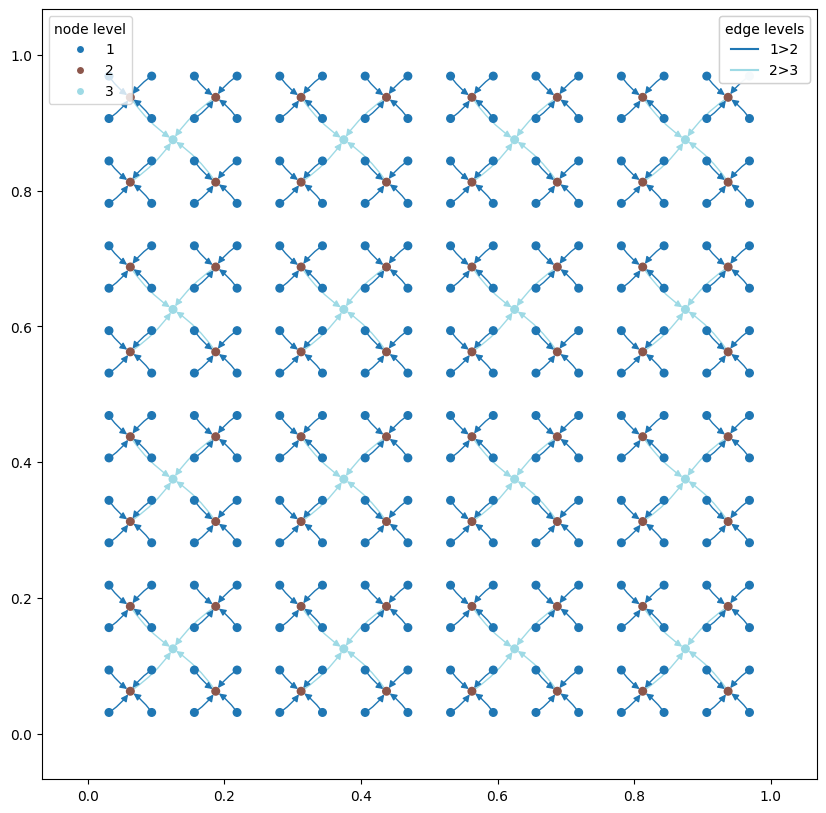

In [7]:
graph_plots.nx_draw_with_pos_and_attr(
    graph_components["mesh_up"],
    node_size=30,
    edge_color_attr="levels",
    node_color_attr="level",
)

In [12]:
xy = _create_fake_xy(20)
full_graph = graph_creation.architypes.create_oscarsson_hierarchical_graph(xy_grid=xy)
graph_components = graph_creation.architypes.create_oscarsson_hierarchical_graph(
    xy_grid=xy, merge_components=False
)
graph_components["full_graph"] = full_graph

2024-04-24 15:03:56.526 | INFO     | neural_lam.graph.mesh.mesh:create_multirange_2d_mesh_graphs:121 - nlev: 4, nleaf: 16, mesh_levels: 3
2024-04-24 15:03:56.636 | INFO     | neural_lam.graph.mesh.mesh:create_multirange_2d_mesh_graphs:121 - nlev: 4, nleaf: 16, mesh_levels: 3


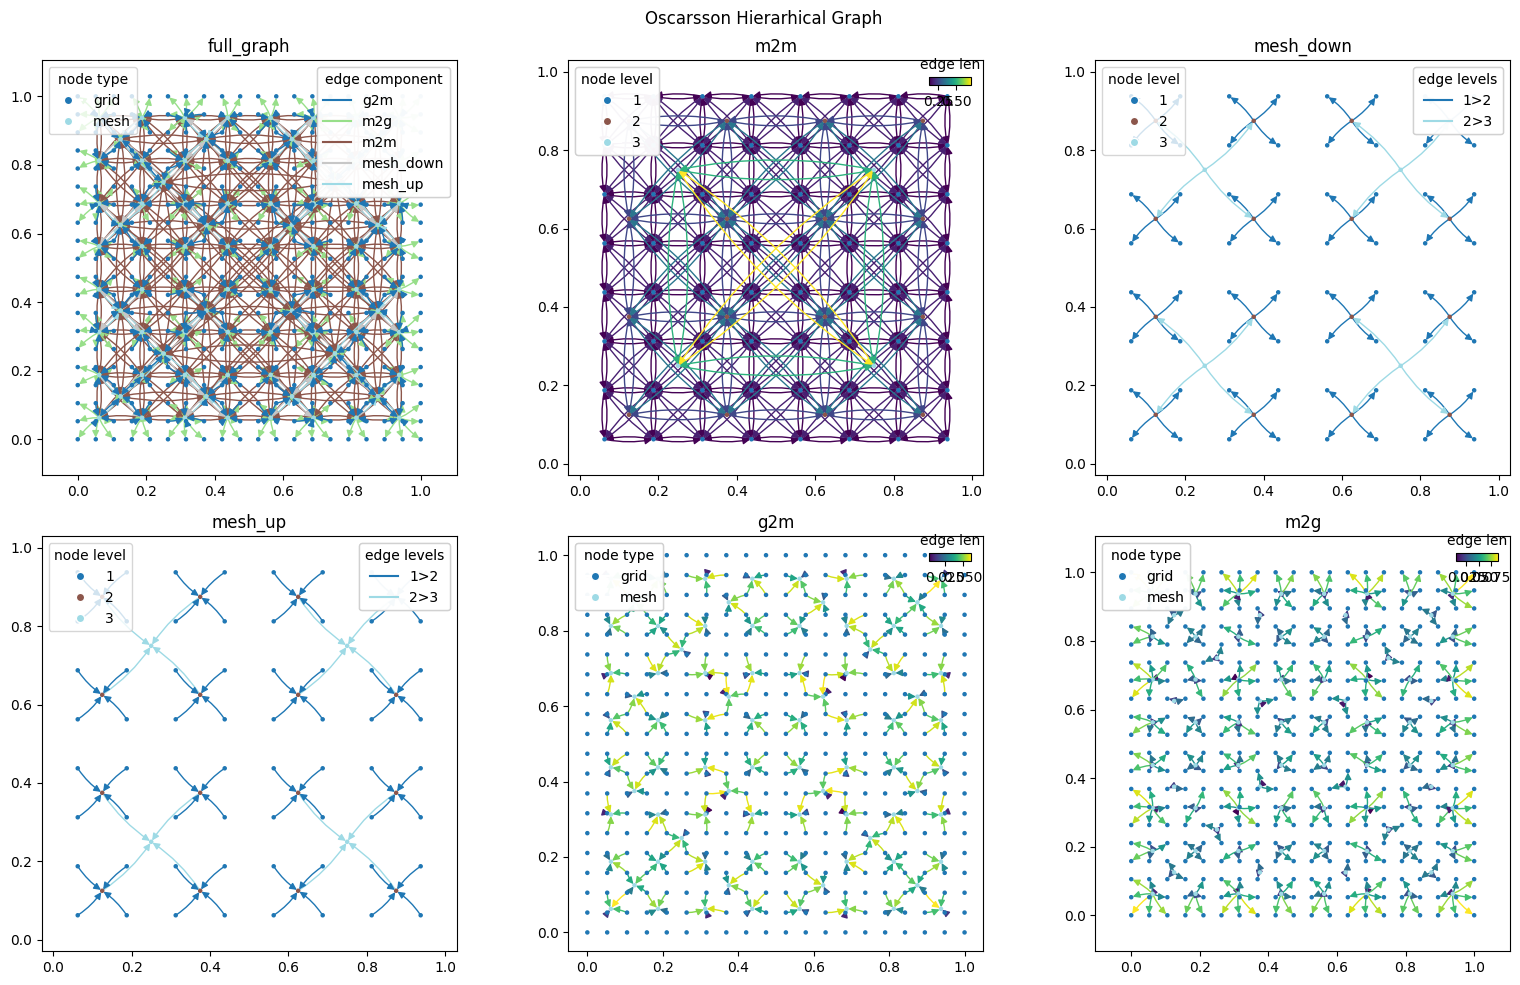

In [17]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 10))

graph_components_ordered = list(graph_components.keys())
graph_components_ordered.remove("full_graph")
graph_components_ordered.insert(0, "full_graph")

for name, ax in zip(graph_components_ordered, axes.flatten()):
    graph = graph_components[name]
    node_size = 5
    pl_kwargs = {}
    if name == "m2m":
        pl_kwargs = dict(
            edge_color_attr="len", node_color_attr="level", node_size=node_size
        )
    elif name == "g2m" or name == "m2g":
        pl_kwargs = dict(
            edge_color_attr="len", node_color_attr="type", node_size=node_size
        )
    elif name in ["mesh_up", "mesh_down"]:
        pl_kwargs = dict(
            edge_color_attr="levels", node_color_attr="level", node_size=node_size
        )
    else:
        pl_kwargs = dict(
            node_size=node_size, edge_color_attr="component", node_color_attr="type"
        )

    graph_plots.nx_draw_with_pos_and_attr(graph, ax=ax, **pl_kwargs)
    ax.set_title(name)
    ax.set_aspect(1.0)

fig.suptitle("Oscarsson Hierarhical Graph")
fig.tight_layout()

In [ ]:
graph_components = graph_creation.create_all_graph_components(
    m2m_connectivity="flat_neighbours", xy=xy, merge_components=False
)

NotImplementedError: Kind flat_neighbours not implemented

In [ ]:
graph_components = graph_creation.create_all_graph_components(
    m2m_connectivity="flat_multiscale",
    xy=xy,
    merge_components=False,
    m2m_connectivity_kwargs=dict(
        max_num_levels=3,
        refinement_factor=2,
    ),
)
graph_components

2024-04-19 15:59:42.225 | INFO     | neural_lam.graph.mesh.mesh:create_multirange_2d_mesh_graphs:119 - nlev: 3, nleaf: 8, mesh_levels: 2


{'m2m': <networkx.classes.digraph.DiGraph at 0x78d981a93a00>,
 'g2m': <networkx.classes.digraph.DiGraph at 0x78d981a8f5b0>,
 'm2g': <networkx.classes.digraph.DiGraph at 0x78d981a5fc40>}

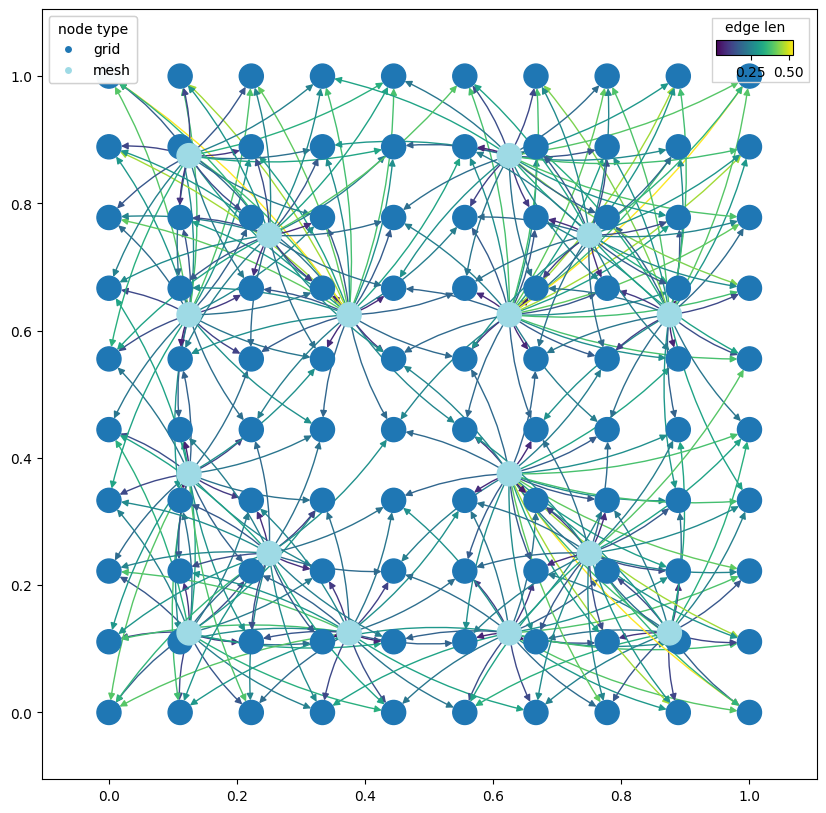

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
# ax = nx_draw_with_pos_and_feature(
# graph_components["m2m"], edge_feature="len", node_feature="level", ax=ax
# )
ax = graph_plots.nx_draw_with_pos_and_attr(
    graph_components["m2g"],
    ax=ax,
    edge_color_attr="len",
    node_color_attr="type",
    node_zorder_attr="level",
)

In [ ]:
graph_components["m2g"].graph

{}

In [ ]:
cmap = plt.get_cmap("Spectral")
norm = Normalize(vmin=0.0, vmax=2.0)
cmap

NameError: name 'Normalize' is not defined

In [ ]:
assert False

AssertionError: 

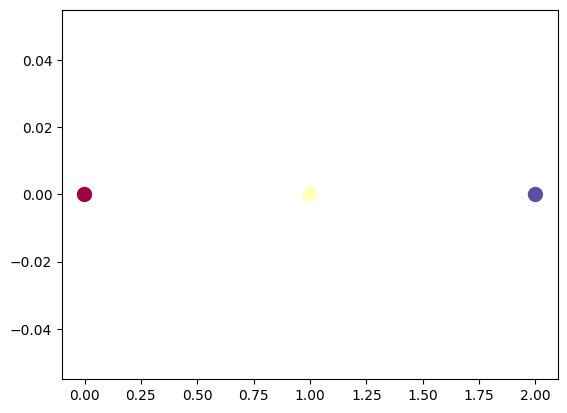

In [ ]:
plt.scatter(
    [0, 1, 2],
    [0, 0, 0],
    marker="o",
    color=[cmap(norm(v)) for v in [0, 1, 2]],
    s=100,
)

In [ ]:
G = mesh_graphs.kinds.flat.create_flat_multiscale_mesh_graph(
    xy=xy, refinement_factor=3, max_num_levels=None
)

nx_dra

Graph with 30 nodes and 49 edges


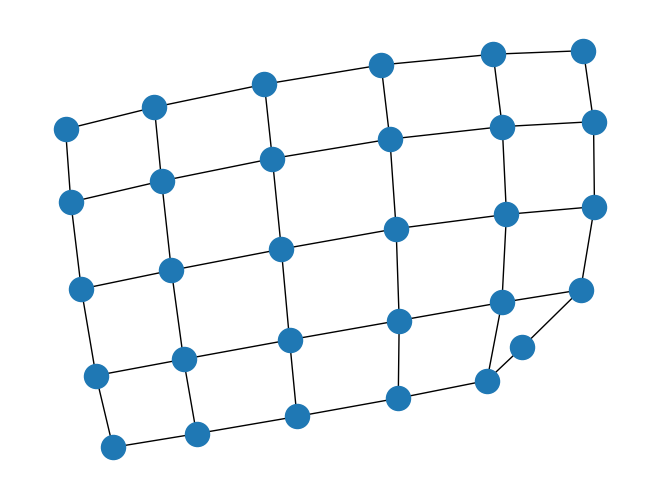

In [ ]:
g = nx.grid_2d_graph(5, 6)
print(g)
nx.draw(g)

In [ ]:
import numpy as np
def _create_fake_xy(N=10):
    x = np.linspace(0, 1, N)
    y = np.linspace(0, 1, N)
    xy = np.meshgrid(x, y)
    xy = np.stack(xy, axis=0)
    return xy

DiGraph with 25 nodes and 144 edges


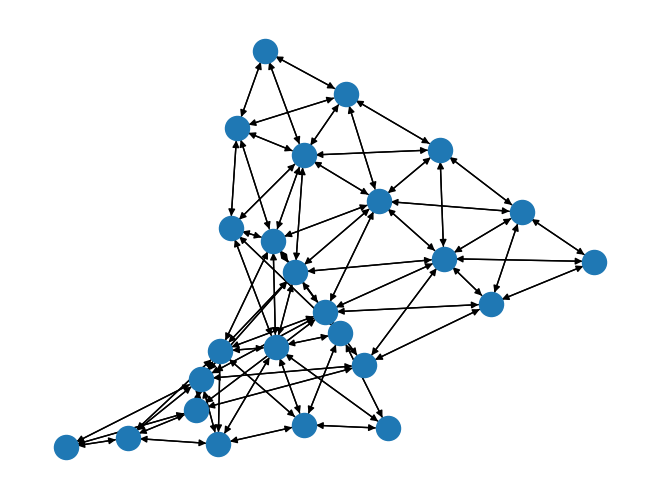

In [ ]:
xy = _create_fake_xy()

g = neural_lam.mesh.create.make_single_level_2d_mesh_graph(xy, nx=5, ny=5)
print(g)
nx.draw(g)

In [ ]:
pyg.utils.from_networkx(g).is_directed()

False

In [ ]:
import neural_lam

In [ ]:
help(neural_lam)

Help on package neural_lam:

NAME
    neural_lam

PACKAGE CONTENTS
    constants
    datasets (package)
    interaction_net
    mesh (package)
    metrics
    mllam_dataset
    train
    utils

FILE
    (built-in)




In [ ]:
# %load ../create_mesh.py
import networkx
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from argparse import ArgumentParser
import scipy.spatial
import torch
import torch_geometric as pyg
import os
from torch_geometric.utils.convert import from_networkx

def plot_graph(graph, title=None):
    fig, axis = plt.subplots(figsize=(8, 8), dpi=200) # W,H
    edge_index = graph.edge_index
    pos = graph.pos

    # Fix for re-indexed edge indices only containing mesh nodes at
    # higher levels in hierarchy
    edge_index = edge_index - edge_index.min()

    if pyg.utils.is_undirected(edge_index):
        # Keep only 1 direction of edge_index
        edge_index = edge_index[:,edge_index[0] < edge_index[1]] # (2, M/2)
    # TODO: indicate direction of directed edges

    # Move all to cpu and numpy, compute (in)-degrees
    degrees = pyg.utils.degree(edge_index[1], num_nodes=pos.shape[0]).cpu().numpy()
    edge_index = edge_index.cpu().numpy()
    pos = pos.cpu().numpy()

    # Plot edges
    from_pos = pos[edge_index[0]] # (M/2, 2)
    to_pos = pos[edge_index[1]] # (M/2, 2)
    edge_lines = np.stack((from_pos, to_pos), axis=1)
    axis.add_collection(matplotlib.collections.LineCollection(edge_lines, lw=0.4,
        colors="black", zorder=1))

    # Plot nodes
    node_scatter = axis.scatter(pos[:,0], pos[:,1], c=degrees, s=3, marker="o", zorder=2,
            cmap="viridis", clim=None)

    plt.colorbar(node_scatter, aspect=50)

    if title is not None:
        axis.set_title(title)

    return fig, axis

def sort_nodes_internally(nx_graph):
    # For some reason the networkx .nodes() return list can not be sorted,
    # but this is the ordering used by pyg when converting. This function fixes this
    H = networkx.DiGraph()
    H.add_nodes_from(sorted(nx_graph.nodes(data=True)))
    H.add_edges_from(nx_graph.edges(data=True))
    return H

def save_edges(graph, name, base_path):
    torch.save(graph.edge_index, os.path.join(base_path, f"{name}_edge_index.pt"))
    edge_features = torch.cat((graph.len.unsqueeze(1), graph.vdiff),
            dim=1).to(torch.float32) # Save as float32
    torch.save(edge_features, os.path.join(base_path, f"{name}_features.pt"))

def save_edges_list(graphs, name, base_path):
    torch.save([graph.edge_index for graph in graphs],
            os.path.join(base_path, f"{name}_edge_index.pt"))
    edge_features = [torch.cat((graph.len.unsqueeze(1), graph.vdiff),
            dim=1).to(torch.float32) for graph in graphs] # Save as float32
    torch.save(edge_features, os.path.join(base_path, f"{name}_features.pt"))

def from_networkx_with_start_index(nx_graph, start_index):
    pyg_graph = from_networkx(nx_graph)
    pyg_graph.edge_index += start_index
    return pyg_graph

def mk_2d_graph(xy, nx, ny):
    xm,xM = np.amin(xy[0][0,:]), np.amax(xy[0][0,:])
    ym,yM = np.amin(xy[1][:,0]), np.amax(xy[1][:,0])

    # avoid nodes on border
    dx = (xM-xm)/nx
    dy = (yM-ym)/ny
    lx = np.linspace(xm+dx/2, xM-dx/2, nx)
    ly = np.linspace(ym+dy/2, yM-dy/2, ny)

    mg = np.meshgrid(lx,ly)
    g = networkx.grid_2d_graph(len(ly),len(lx))

    for node in g.nodes:
        g.nodes[node]['pos'] = np.array([mg[0][node],mg[1][node]])

    # add diagonal edges
    g.add_edges_from([
        ((x, y), (x+1, y+1))
        for x in range(nx-1)
        for y in range(ny-1)
        ] + [
        ((x+1, y), (x, y+1))
        for x in range(nx-1)
        for y in range(ny-1)
    ])

    # turn into directed graph
    dg = networkx.DiGraph(g)
    for (u, v) in g.edges():
        d = np.sqrt(np.sum((g.nodes[u]['pos']-g.nodes[v]['pos'])**2))
        dg.edges[u,v]['len'] = d
        dg.edges[u,v]['vdiff'] = g.nodes[u]['pos']-g.nodes[v]['pos']
        dg.add_edge(v, u)
        dg.edges[v,u]['len'] = d
        dg.edges[v,u]['vdiff'] = g.nodes[v]['pos']-g.nodes[u]['pos']

    return dg

def prepend_node_index(graph, new_index):
    # Relabel node indices in graph, insert (graph_level, i, j)
    ijk= [tuple((new_index,)+x) for x in graph.nodes]
    to_mapping = dict(zip(graph.nodes, ijk))
    return networkx.relabel_nodes(graph, to_mapping, copy=True)

In [ ]:
import collections
import torch

Args = collections.namedtuple("args", ["plot", "hierarchical", "levels"])
args = Args(plot=False, hierarchical=True, levels=None)

In [ ]:
xy = _create_fake_xy(N=100)

In [ ]:
grid_xy = torch.tensor(xy)
pos_max = torch.max(torch.abs(grid_xy))

#
# Mesh
#

# graph geometry
nx = 3 # number of children = nx**2
nlev = int(np.log(max(xy.shape))/np.log(nx))
nleaf = nx**nlev # leaves at the bottom = nleaf**2

mesh_levels = nlev-1
if args.levels:
    # Limit the levels in mesh graph
    mesh_levels = min(mesh_levels, args.levels)

print(f"nlev: {nlev}, nleaf: {nleaf}, mesh_levels: {mesh_levels}")

# multi resolution tree levels
G = []
for lev in range(1, mesh_levels+1):
    n = int(nleaf/(nx**lev))
    g = mk_2d_graph(xy, n, n)
    if args.plot:
        plot_graph(from_networkx(g), title=f"Mesh graph, level {lev}")
        plt.show()

    G.append(g)

nlev: 4, nleaf: 81, mesh_levels: 3


In [ ]:
G

In [ ]:

if args.hierarchical:
    # Relabel nodes of each level with level index first
    G_prepended = [prepend_node_index(graph, level_i) for level_i, graph in enumerate(G)]
    
    del(G)

    num_nodes_level = np.array([len(g_level.nodes) for g_level in G_prepended])
    # First node index in each level in the hierarcical graph
    first_index_level = np.concatenate((
        np.zeros(1, dtype=int),
        np.cumsum(num_nodes_level[:-1])))

    # Create inter-level mesh edges
    up_graphs_pyg = []
    down_graphs_pyg = []
    down_graphs_nx = []
    for from_level, to_level, G_from, G_to, start_index in zip(
            range(1, mesh_levels),
            range(0, mesh_levels-1),
            G_prepended[1:],
            G_prepended[:-1],
            first_index_level[:mesh_levels-1]):

        # start out from graph at from level
        G_down = G_from.copy()
        G_down.clear_edges()
        G_down = networkx.DiGraph(G_down)

        # Add nodes of to level
        G_down.add_nodes_from(G_to.nodes(data=True))

        # build kd tree for mesh point pos
        # order in vm should be same as in vm_xy
        v_to_list = list(G_to.nodes)
        v_from_list = list(G_from.nodes)
        v_from_xy = np.array([xy for _, xy in G_from.nodes.data('pos')])
        kdt_m = scipy.spatial.KDTree(v_from_xy)

        # add edges from mesh to grid
        for v in v_to_list:
            # find 1(?) nearest neighbours (index to vm_xy)
            neigh_idx = kdt_m.query(G_down.nodes[v]['pos'], 1)[1]
            u = v_from_list[neigh_idx]

            # add edge from mesh to grid
            G_down.add_edge(u, v)
            d = np.sqrt(np.sum((G_down.nodes[u]['pos']-G_down.nodes[v]['pos'])**2))
            G_down.edges[u,v]['len'] = d
            G_down.edges[u,v]['vdiff'] = G_down.nodes[u]['pos']-G_down.nodes[v]['pos']

        # relabel nodes to integers (sorted)
        G_down_int = networkx.convert_node_labels_to_integers(G_down,
                first_label=start_index, ordering='sorted') # Issue with sorting here
        G_down_int = sort_nodes_internally(G_down_int)
        pyg_down = from_networkx_with_start_index(G_down_int , start_index)

        # Create up graph, invert downwards edges
        up_edges = torch.stack((pyg_down.edge_index[1], pyg_down.edge_index[0]),
                dim=0)
        pyg_up = pyg_down.clone()
        pyg_up.edge_index = up_edges

        up_graphs_pyg.append(pyg_up)
        down_graphs_pyg.append(pyg_down)
        down_graphs_nx.append(G_down)

        if args.plot:
            plot_graph(pyg_down, title=f"Down graph, {from_level} -> {to_level}")
            plt.show()

            plot_graph(pyg_down, title=f"Up graph, {to_level} -> {from_level}")
            plt.show()

    # Save up and down edges
    # save_edges_list(up_graphs, "mesh_up", graph_dir_path)
    # save_edges_list(down_graphs, "mesh_down", graph_dir_path)

    # Extract intra-level edges for m2m
    m2m_graphs = [from_networkx_with_start_index(
        networkx.convert_node_labels_to_integers(level_graph,
            first_label=start_index, ordering='sorted'), start_index)
        for level_graph, start_index in zip(G_prepended, first_index_level)]

    mesh_pos = [graph.pos.to(torch.float32) for graph in m2m_graphs]

    # For use in g2m and m2g
    G_bottom_mesh = G_prepended[0]

    joint_mesh_graph = networkx.union_all([graph for graph in G_prepended])
    all_mesh_nodes = joint_mesh_graph.nodes(data=True)

else:
    # combine all levels to one graph
    G_tot = G[0]
    for lev in range(1,len(G)):
        nodes = list(G[lev-1].nodes)
        n = int(np.sqrt(len(nodes)))
        ij = np.array(nodes).reshape((n,n,2))[1::nx,1::nx,:].reshape(int(n/nx)**2,2)
        ij = [tuple(x) for x in ij]
        G[lev] = networkx.relabel_nodes(G[lev], dict(zip(G[lev].nodes, ij)))
        G_tot = networkx.compose(G_tot, G[lev])

    # Relabel mesh nodes to start with 0
    G_tot = prepend_node_index(G_tot, 0)

    # relabel nodes to integers (sorted)
    G_int = networkx.convert_node_labels_to_integers(G_tot, first_label=0,
            ordering='sorted')

    # Graph to use in g2m and m2g
    G_bottom_mesh = G_tot
    all_mesh_nodes = G_tot.nodes(data=True)

    # export the nx graph to PyTorch geometric
    pyg_m2m = from_networkx(G_int)
    m2m_graphs = [pyg_m2m]
    mesh_pos = [pyg_m2m.pos.to(torch.float32)]

    if args.plot:
        plot_graph(pyg_m2m, title="Mesh-to-mesh")
        plt.show()

# Save m2m edges
# save_edges_list(m2m_graphs, "m2m", graph_dir_path)

In [ ]:
def nx_draw_with_pos(g, with_labels=True, **kwargs):
    pos = {node: g.nodes[node]["pos"] for node in g.nodes()}
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    networkx.draw_networkx(
        ax=ax, G=g, pos=pos, hide_ticks=False, with_labels=with_labels, **kwargs
    )

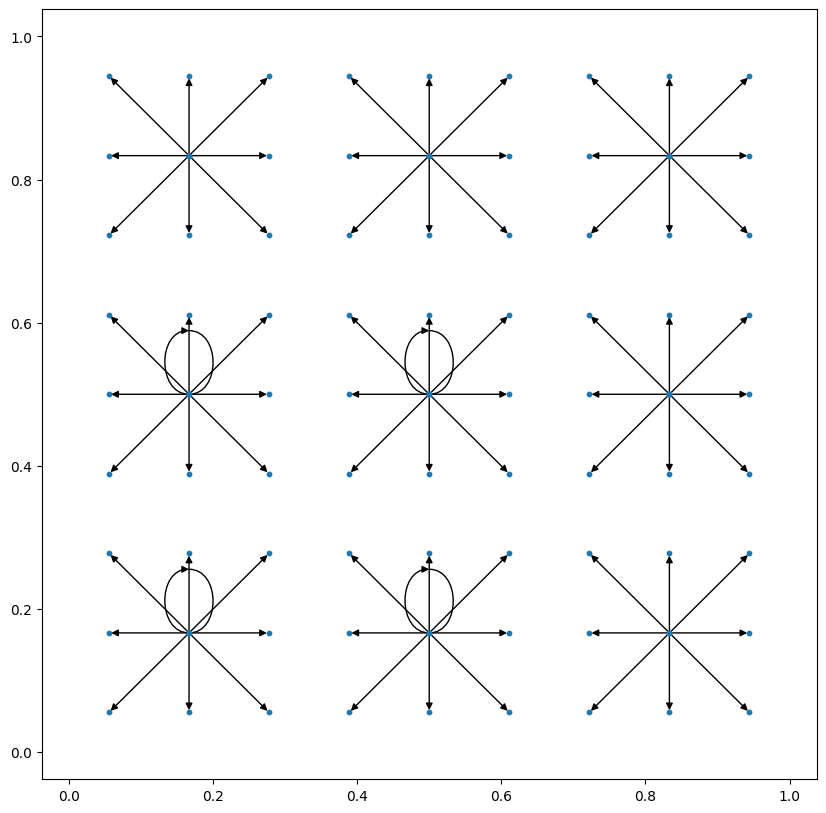

In [ ]:
nx_draw_with_pos(down_graphs_nx[1], node_size=10, with_labels=False)

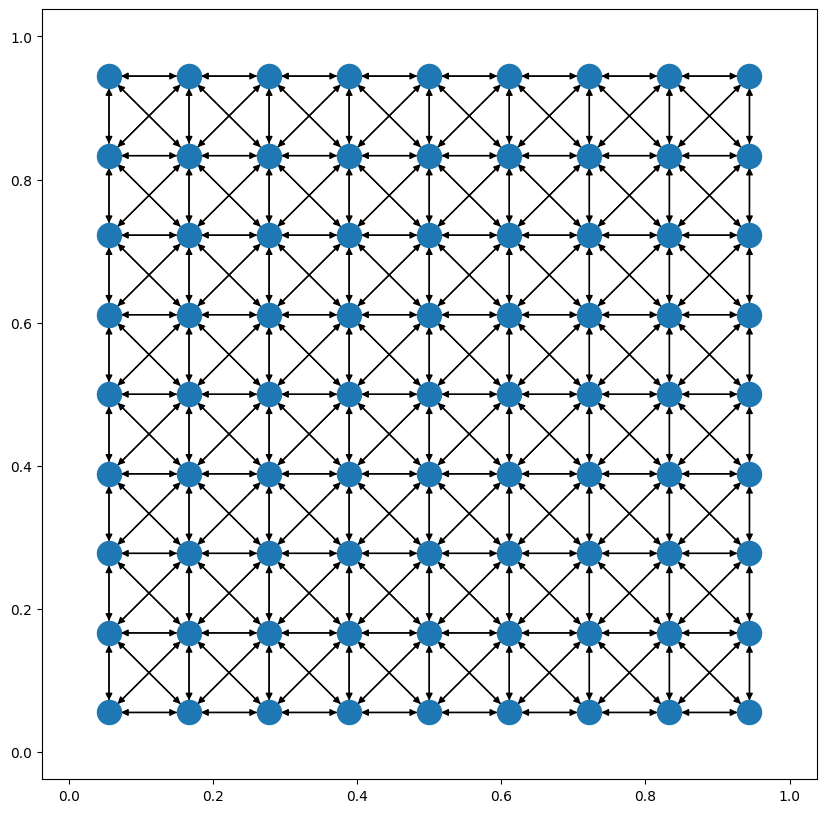

In [ ]:
nx_draw_with_pos(G_bottom_mesh, with_labels=False)

In [ ]:


# Divide mesh node pos by max coordinate of grid cell
mesh_pos = [pos/pos_max for pos in  mesh_pos]

# Save mesh positions
torch.save(mesh_pos, os.path.join(graph_dir_path,
    "mesh_features.pt")) # mesh pos, in float32

#
# Grid2Mesh
#

# radius within which grid nodes are associated with a mesh node
# (in terms of mesh distance)
DM_SCALE = 0.67

# mesh nodes on lowest level
vm = G_bottom_mesh.nodes
vm_xy = np.array([xy for _, xy in vm.data('pos')])
# distance between mesh nodes
dm = np.sqrt(np.sum((vm.data('pos')[(0,1,0)] - vm.data('pos')[(0,0,0)])**2))

# grid nodes
Ny, Nx = xy.shape[1:]

G_grid = networkx.grid_2d_graph(Ny, Nx)
G_grid.clear_edges()

# vg features (only pos introduced here)
for node in G_grid.nodes:
    # pos is in feature but here explicit for convenience
    G_grid.nodes[node]['pos'] = np.array([xy[0][node],xy[1][node]])

# add 1000 to node key to separate grid nodes (1000,i,j) from mesh nodes (i,j)
# and impose sorting order such that vm are the first nodes
G_grid = prepend_node_index(G_grid, 1000)

# build kd tree for grid point pos
# order in vg_list should be same as in vg_xy
vg_list = list(G_grid.nodes)
vg_xy = np.array([[xy[0][node[1:]],xy[1][node[1:]]] for node in vg_list])
kdt_g = scipy.spatial.KDTree(vg_xy)

# now add (all) mesh nodes, include features (pos)
G_grid.add_nodes_from(all_mesh_nodes)

# Re-create graph with sorted node indices
# Need to do sorting of nodes this way for indices to map correctly to pyg
G_g2m = networkx.Graph()
G_g2m.add_nodes_from(sorted(G_grid.nodes(data=True)))

# turn into directed graph
G_g2m = networkx.DiGraph(G_g2m)

# add edges
for v in vm:
    # find neighbours (index to vg_xy)
    neigh_idxs = kdt_g.query_ball_point(vm[v]['pos'], dm*DM_SCALE)
    for i in neigh_idxs:
        u = vg_list[i]
        # add edge from grid to mesh
        G_g2m.add_edge(u, v)
        d = np.sqrt(np.sum((G_g2m.nodes[u]['pos']-G_g2m.nodes[v]['pos'])**2))
        G_g2m.edges[u,v]['len'] = d
        G_g2m.edges[u,v]['vdiff'] = G_g2m.nodes[u]['pos']-G_g2m.nodes[v]['pos']

pyg_g2m = from_networkx(G_g2m)

if args.plot:
    plot_graph(pyg_g2m, title="Grid-to-mesh")
    plt.show()

#
# Mesh2Grid
#

# start out from Grid2Mesh and then replace edges
G_m2g = G_g2m.copy()
G_m2g.clear_edges()

# build kd tree for mesh point pos
# order in vm should be same as in vm_xy
vm_list = list(vm)
kdt_m = scipy.spatial.KDTree(vm_xy)

# add edges from mesh to grid
for v in vg_list:
    # find 4 nearest neighbours (index to vm_xy)
    neigh_idxs = kdt_m.query(G_m2g.nodes[v]['pos'], 4)[1]
    for i in neigh_idxs:
        u = vm_list[i]
        # add edge from mesh to grid
        G_m2g.add_edge(u, v)
        d = np.sqrt(np.sum((G_m2g.nodes[u]['pos']-G_m2g.nodes[v]['pos'])**2))
        G_m2g.edges[u,v]['len'] = d
        G_m2g.edges[u,v]['vdiff'] = G_m2g.nodes[u]['pos']-G_m2g.nodes[v]['pos']

# relabel nodes to integers (sorted)
G_m2g_int = networkx.convert_node_labels_to_integers(G_m2g, first_label=0,
        ordering='sorted')
pyg_m2g = from_networkx(G_m2g_int)

if args.plot:
    plot_graph(pyg_m2g, title="Mesh-to-grid")
    plt.show()

# Save g2m and m2g everything
# g2m
# save_edges(pyg_g2m, "g2m", graph_dir_path)
# # m2g
# save_edges(pyg_m2g, "m2g", graph_dir_path)